In [1]:
import pandas as pd
import zipfile
import seaborn as sns

In [2]:
data_path="../data/data_accuracy/"

In [3]:
calender=pd.read_csv(data_path+"calendar.csv")

In [4]:
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
calender.shape

(1969, 14)

In [6]:
sales_data=pd.read_csv(data_path+"sell_prices.csv")

In [7]:
sales_data.sort_values('wm_yr_wk')

,store_id,item_id,wm_yr_wk,sell_price
3886602,TX_2,FOODS_2_243,11101,5.98
6489238,WI_3,HOUSEHOLD_2_421,11101,4.67
6138163,WI_2,FOODS_3_799,11101,1.98
4717697,TX_3,FOODS_3_452,11101,4.72
1356987,CA_3,HOBBIES_1_092,11101,2.28
...,...,...,...,...
1967349,CA_3,FOODS_3_546,11621,5.98
1967067,CA_3,FOODS_3_545,11621,1.00
1966919,CA_3,FOODS_3_544,11621,2.98
1969033,CA_3,FOODS_3_554,11621,3.48


In [8]:
sales_train_validation=pd.read_csv(data_path+"sales_train_validation.csv")

In [9]:
sales_train_validation

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [10]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [11]:
calender["event_name_1"].value_counts()

SuperBowl              6
Pesach End             6
Ramadan starts         6
ValentinesDay          6
NBAFinalsEnd           6
NBAFinalsStart         6
MemorialDay            6
Mother's day           6
Purim End              6
StPatricksDay          6
LentWeek2              6
LentStart              6
PresidentsDay          6
MartinLutherKingDay    5
OrthodoxChristmas      5
EidAlAdha              5
NewYear                5
Chanukah End           5
Christmas              5
Thanksgiving           5
VeteransDay            5
IndependenceDay        5
Halloween              5
ColumbusDay            5
LaborDay               5
Eid al-Fitr            5
Cinco De Mayo          5
OrthodoxEaster         5
Easter                 5
Father's day           4
Name: event_name_1, dtype: int64

In [12]:
calender["event_type_1"].value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [13]:
calender["event_name_2"].value_counts()

Father's day      2
Easter            1
Cinco De Mayo     1
OrthodoxEaster    1
Name: event_name_2, dtype: int64

In [14]:
calender["event_type_2"].value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

In [15]:
calender[["event_name_1","event_type_1","event_name_2","event_type_2"]][calender['event_name_2'].notnull()]

,event_name_1,event_type_1,event_name_2,event_type_2
85,OrthodoxEaster,Religious,Easter,Cultural
827,OrthodoxEaster,Religious,Cinco De Mayo,Cultural
1177,Easter,Cultural,OrthodoxEaster,Religious
1233,NBAFinalsEnd,Sporting,Father's day,Cultural
1968,NBAFinalsEnd,Sporting,Father's day,Cultural


In [16]:
calender['snap_CA'].value_counts()

0    1319
1     650
Name: snap_CA, dtype: int64

In [17]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [18]:
sales_data.isnull().sum()

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [19]:
sales_data["store_id"].value_counts()

TX_2    701214
TX_1    699796
CA_1    698412
WI_3    696094
CA_3    693990
TX_3    691112
CA_4    679025
WI_2    678171
WI_1    665912
CA_2    637395
Name: store_id, dtype: int64

In [20]:
sales_data["item_id"].value_counts()

FOODS_3_587        2820
HOUSEHOLD_1_177    2820
HOUSEHOLD_2_283    2820
HOBBIES_1_337      2820
FOODS_1_032        2820
                   ... 
HOUSEHOLD_1_308     642
HOUSEHOLD_1_159     623
HOUSEHOLD_1_242     600
FOODS_3_296         592
FOODS_2_379         530
Name: item_id, Length: 3049, dtype: int64

In [21]:
sales_train_validation.shape

(30490, 1919)

In [22]:
sales_data.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


<AxesSubplot:xlabel='sell_price', ylabel='Count'>

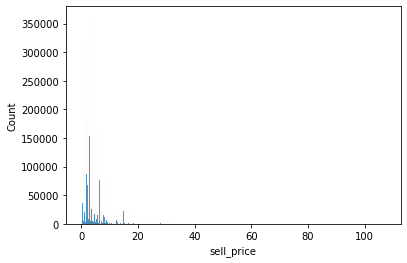

In [23]:
sns.histplot(x="sell_price",data=sales_data)

In [24]:
# time series plot of weekly prices

In [25]:
grouped_sales = sales_data[["wm_yr_wk","sell_price"]].groupby("wm_yr_wk").quantile([0.25, 0.5, 0.75])

In [26]:
grouped_sales.reset_index(inplace=True)

In [27]:
grouped_sales.columns=["wm_yr_wk","quantiles","sell_price"]

In [28]:
grouped_sales

,wm_yr_wk,quantiles,sell_price
0,11101,0.25,1.98
1,11101,0.50,3.12
2,11101,0.75,5.47
3,11102,0.25,1.98
4,11102,0.50,3.22
...,...,...,...
841,11620,0.50,3.48
842,11620,0.75,5.84
843,11621,0.25,2.24
844,11621,0.50,3.48


<AxesSubplot:xlabel='wm_yr_wk', ylabel='sell_price'>

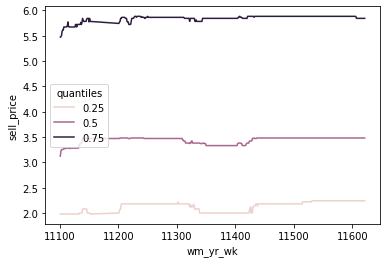

In [29]:
sns.lineplot(x="wm_yr_wk",y="sell_price",hue="quantiles",data=grouped_sales[grouped_sales["quantiles"]<1.0])

In [30]:
calender.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [31]:
sales_data_joined=pd.merge(sales_data,calender,on="wm_yr_wk",how="left")

In [32]:
def sales_data_group_plot(data,level):
    grouped_sales = data[[level,"sell_price"]].groupby(level).quantile([0.25, 0.5, 0.75])
    grouped_sales.reset_index(inplace=True)
    grouped_sales.columns=[level,"quantiles","sell_price"]
    sns.lineplot(x=level,y="sell_price",hue="quantiles",data=grouped_sales[grouped_sales["quantiles"]<1.0])
    del grouped_sales

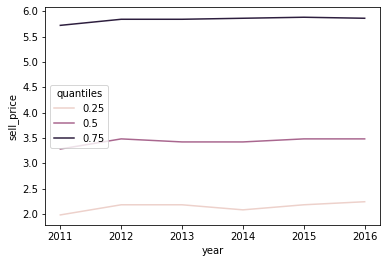

In [33]:
sales_data_group_plot(sales_data_joined,"year")

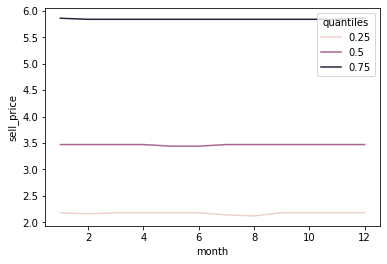

In [34]:
sales_data_group_plot(sales_data_joined,"month")

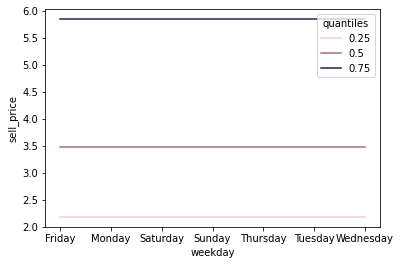

In [35]:
sales_data_group_plot(sales_data_joined,"weekday")

In [36]:
def sales_data_boxplot(data,level):
    sns.boxplot(x=level,y="sell_price_log",data=sales_data_joined)


In [37]:
sales_data_joined.fillna({"event_type_1":"noevent","event_type_2":"noevent","event_name_1":"noevent","event_name_2":"noevent"},inplace=True)

In [38]:
import numpy as np

In [39]:
sales_data_joined["sell_price_log"]=np.log(sales_data_joined["sell_price"]+1)

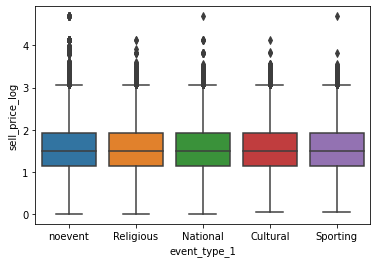

In [40]:
sales_data_boxplot(sales_data_joined,"event_type_1")

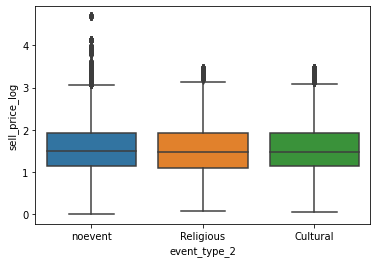

In [41]:
sales_data_boxplot(sales_data_joined,"event_type_2")

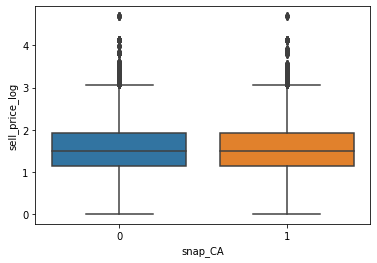

In [42]:
sales_data_boxplot(sales_data_joined,"snap_CA")

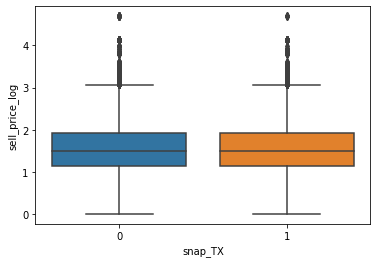

In [43]:
sales_data_boxplot(sales_data_joined,"snap_TX")

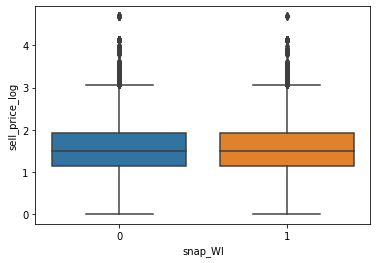

In [44]:
sales_data_boxplot(sales_data_joined,"snap_WI")

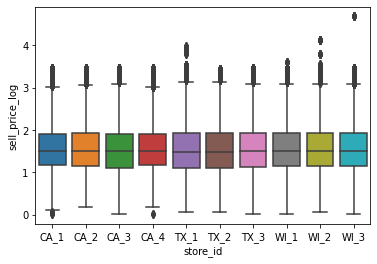

In [45]:
sales_data_boxplot(sales_data_joined,"store_id")

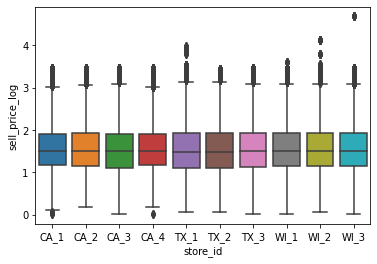

In [46]:
sales_data_boxplot(sales_data_joined,"store_id")

In [47]:
sales_data_joined["prod_tye"]=sales_data_joined["item_id"].apply(lambda x:x.split("_")[0])

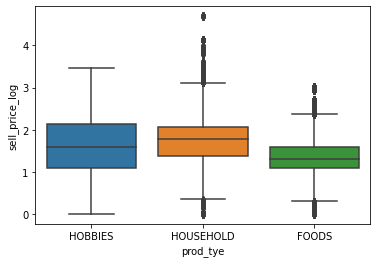

In [48]:
sales_data_boxplot(sales_data_joined,"prod_tye")

In [49]:
sales_train_validation

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


In [50]:
sales_train_validation["id"].nunique()

30490

In [51]:
sales_train_validation["num_id"]=sales_train_validation["id"]

In [52]:
sales_train_validation_small=sales_train_validation.loc[:,"d_1":]

In [53]:
sales_train_validation_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1914 entries, d_1 to num_id
dtypes: int64(1913), object(1)
memory usage: 445.2+ MB


In [54]:
value_vars=list(sales_train_validation_small.columns)[:-1]

In [55]:
sales_train_validation_small = pd.melt(sales_train_validation_small,id_vars="num_id",value_vars=value_vars)

In [56]:
sales_train_validation_small.columns=["id","d","sale"]

In [57]:
sales_train_validation_small.to_csv(data_path+"/data_trainval_long.csv",index=False)